<a href="https://colab.research.google.com/github/prateek66/deep_learning/blob/main/Cattle_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Become one with the data

## Create the dataset

In [1]:
#download from google drive
! gdown --id 1Hsu4rprJF0yc55osI25LdqGwKhuMyHKC

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Hsu4rprJF0yc55osI25LdqGwKhuMyHKC
To: /content/cattle_breed.zip
100% 3.05G/3.05G [00:25<00:00, 119MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile("cattle_breed.zip")
zip_ref.extractall();
zip_ref.close()

In [3]:
import os
path = "/content/cattle_breeds"
print(os.listdir(path))

['Nimari', 'Banni', 'Holstein_Friesian', 'Toda', 'Nagpuri', 'Bhadawari', 'Nili_Ravi', 'Rathi', 'Vechur', 'Murrah', 'Tharparkar', 'Alambadi', 'Red_Dane', 'Red_Sindhi', 'Gir', 'Ongole', 'Kangayam', 'Brown_Swiss', 'Mehsana', 'Hallikar', 'Jersey', 'Deoni', 'Pulikulam', 'Hariana', 'Kankrej', 'Guernsey', 'Umblachery', 'Dangi', 'Surti', 'Kasargod', 'Bargur', 'Jaffrabadi', 'Kenkatha', 'Nagori', 'Sahiwal', 'Khillari', 'Amritmahal', 'Ayrshire', 'Krishna_Valley', 'Kherigarh', 'Malnad_gidda']


In [12]:
!pip install split-folders[full]
import splitfolders

splitfolders.ratio("/content/cattle_breeds", # The location of dataset
                   output="/content/dataSet", # The output location
                   seed=42, # The number of seed
                   ratio=(.8, .2, 0), # The ratio of splited dataset
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # If you choose to move, turn this into True
                   )

Copying files: 819 files [00:00, 2094.21 files/s]


In [ ]:
ls /content/dataSet

test/  train/  val/


In [ ]:
ls /content/cattle_breeds

Alambadi/     Gir/                Kasargod/        Nagpuri/     Surti/
Amritmahal/   Guernsey/           Kenkatha/        Nili_Ravi/   Tharparkar/
Ayrshire/     Hallikar/           Kherigarh/       Nimari/      Toda/
Banni/        Hariana/            Khillari/        Ongole/      Umblachery/
Bargur/       Holstein_Friesian/  Krishna_Valley/  Pulikulam/   Vechur/
Bhadawari/    Jaffrabadi/         Malnad_gidda/    Rathi/
Brown_Swiss/  Jersey/             Mehsana/         Red_Dane/
Dangi/        Kangayam/           Murrah/          Red_Sindhi/
Deoni/        Kankrej/            Nagori/          Sahiwal/


In [ ]:
ls /content

archive.zip  cattle_breeds/  sample_data/


In [4]:
import os
os.system("rm -r /content/cattle_breeds/Alambadi /content/cattle_breeds/Amritmahal /content/cattle_breeds/Ayrshire /content/cattle_breeds/Bargur /content/cattle_breeds/Brown_Swiss /content/cattle_breeds/Dangi /content/cattle_breeds/Gir /content/cattle_breeds/Guernsey /content/cattle_breeds/Hallikar /content/cattle_breeds/Hariana /content/cattle_breeds/Holstein_Friesian /content/cattle_breeds/Jaffrabadi /content/cattle_breeds/Kangayam /content/cattle_breeds/Kankrej /content/cattle_breeds/Kasargod /content/cattle_breeds/Kenkatha /content/cattle_breeds/Khillari /content/cattle_breeds/Krishna_Valley /content/cattle_breeds/Malnad_gidda /content/cattle_breeds/Mehsana /content/cattle_breeds/Nagori /content/cattle_breeds/Nagpuri /content/cattle_breeds/Nili_Ravi /content/cattle_breeds/Nimari /content/cattle_breeds/Ongole /content/cattle_breeds/Pulikulam /content/cattle_breeds/Red_Dane /content/cattle_breeds/Red_Sindhi /content/cattle_breeds/Sahiwal /content/cattle_breeds/Surti /content/cattle_breeds/Tharparkar /content/cattle_breeds/Toda /content/cattle_breeds/Umblachery /content/cattle_breeds/Vechur")

0

In [5]:
os.system("rm -r /content/cattle_breeds/Kherigarh")

0

In [11]:
import os
os.system("mv /content/cattle_breeds/Rathi/* /content/cattle_breeds/cow")

0

In [13]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/dataSet"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '/content/dataSet'.
There are 3 directories and 0 images in '/content/dataSet/train'.
There are 0 directories and 360 images in '/content/dataSet/train/cow'.
There are 0 directories and 294 images in '/content/dataSet/train/buffalo'.
There are 0 directories and 0 images in '/content/dataSet/train/.ipynb_checkpoints'.
There are 3 directories and 0 images in '/content/dataSet/val'.
There are 0 directories and 90 images in '/content/dataSet/val/cow'.
There are 0 directories and 73 images in '/content/dataSet/val/buffalo'.
There are 0 directories and 0 images in '/content/dataSet/val/.ipynb_checkpoints'.
There are 3 directories and 0 images in '/content/dataSet/test'.
There are 0 directories and 1 images in '/content/dataSet/test/cow'.
There are 0 directories and 1 images in '/content/dataSet/test/buffalo'.
There are 0 directories and 0 images in '/content/dataSet/test/.ipynb_checkpoints'.


In [17]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/dataSet/train/"
test_dir = "/content/dataSet/val/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="binary")

print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="binary")

Training images:
Found 653 images belonging to 2 classes.
Testing images:
Found 163 images belonging to 2 classes.


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
!cp -r "/content/cattle_breeds" "/content/drive/MyDrive/binary_cattle_dataSet"

In [135]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [136]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [137]:
def create_model(model_url, num_classes=1):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  print("enterr")
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='sigmoid', name='output_layer') # create our own output layer
  ])
  return model

In [138]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url) # use EfficientNetB0 TensorFlow Hub URL)

# Compile EfficientNet model
efficientnet_model.compile(loss='binary_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model
efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              )

enterr
Epoch 1/5
 3/21 [===>..........................] - ETA: 4s - loss: 0.7092 - accuracy: 0.5625

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


21/21 [==============================] - 24s 632ms/step - loss: 0.5454 - accuracy: 0.7856 - val_loss: 0.4195 - val_accuracy: 0.8896
Epoch 2/5
21/21 [==============================] - 14s 654ms/step - loss: 0.3091 - accuracy: 0.9571 - val_loss: 0.2772 - val_accuracy: 0.9571
Epoch 3/5
21/21 [==============================] - 12s 573ms/step - loss: 0.2104 - accuracy: 0.9740 - val_loss: 0.2152 - val_accuracy: 0.9571
Epoch 4/5
21/21 [==============================] - 13s 655ms/step - loss: 0.1653 - accuracy: 0.9740 - val_loss: 0.1806 - val_accuracy: 0.9571
Epoch 5/5
21/21 [==============================] - 12s 564ms/step - loss: 0.1379 - accuracy: 0.9770 - val_loss: 0.1590 - val_accuracy: 0.9571


In [25]:
efficientnet_model.predict(train_data)

21/21 [==============================] - 10s 423ms/step


array([[1.2731070e-03, 2.7907373e-02, 9.7081953e-01],
       [3.7400547e-02, 9.8287240e-02, 8.6431217e-01],
       [3.8735999e-04, 8.5385084e-01, 1.4576177e-01],
       ...,
       [1.1201474e-03, 9.6997887e-01, 2.8901080e-02],
       [5.1874697e-04, 2.6133245e-02, 9.7334802e-01],
       [2.4077231e-03, 9.5830905e-01, 3.9283283e-02]], dtype=float32)

In [81]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

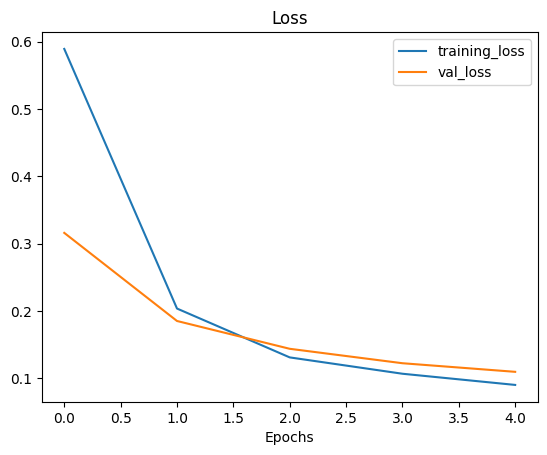

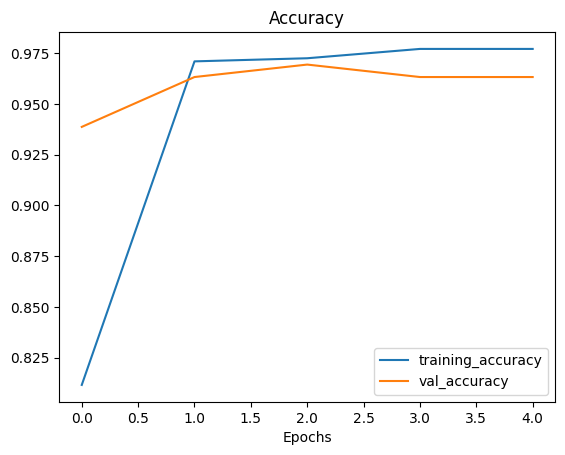

In [27]:
plot_loss_curves(efficientnet_history)

In [139]:
def load_pre_img(filename, img_shape=224):
#Read The Image file
  img = tf.io.read_file(filename)
#Decode the Image File to Tensors
  img = tf.image.decode_image(img)
# Resize to 224
  img = tf.image.resize(img, size=[img_shape,img_shape])
# Convert pixels in binary form i.e 0 and 1 (tensors/pixels are like - [[[64.122][42.42]]]) we need it in 0 and 1 form
  img = img/225.
  return img

In [140]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/dataSet/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['buffalo' 'cow']


In [16]:
os.system("rmdir /content/dataSet/val/.ipynb_checkpoints")

0

In [141]:
# Make predictions with model
pred_probs = efficientnet_model.predict(test_data, verbose=1) # set verbosity to see how long it will take

6/6 [==============================] - 3s 397ms/step


In [85]:
len(pred_probs)

163

In [142]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [124]:
y_labels = []
for i in range(len(test_data)):
    batch = test_data[i]
    batch_labels = batch[1]  # Get the labels from the batch
    y_labels.extend(batch_labels.argmax(axis=1).tolist())

y_labels[:10]

TypeError: ignored

In [130]:
test_data.reset()

In [143]:
y_labels = []
for i in range(len(test_data)):
    batch = test_data[i]
    batch_labels = batch[1]  # Get the labels from the batch
    y_labels.extend(batch_labels)

y_labels[:10]

[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]

In [126]:
len(y_labels)

163

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes,zero_division=1))

              precision    recall  f1-score   support

         0.0       0.45      1.00      0.62        73
         1.0       1.00      0.00      0.00        90

    accuracy                           0.45       163
   macro avg       0.72      0.50      0.31       163
weighted avg       0.75      0.45      0.28       163



In [35]:
pred = efficientnet_model.predict(tf.expand_dims(steak,axis=0))
pred

NameError: ignored

In [36]:
pred_class = class_names[int(tf.round(pred))]
pred_class

NameError: ignored

In [72]:
#helper Function
def predict_img(model,filename,className = class_names):
  #load the data
  img_pred = load_pre_img(filename);

  #now load the model to fit the image
  pred_model = model.predict(tf.expand_dims(img_pred,axis=0))


  # Add in logic for multi-class & get pred_class name
  if len (pred_model[0]) > 1:
    print("Array")
    pred_class = class_names[tf.argmax(pred_model[0])]
  else:
    print("binary")
    pred_class = class_names[int(tf.round(pred_model))]


  #plot the image and predict class
  plt.imshow(img_pred)
  plt.title(f"prediction - {pred_class}")
  plt.axis(False)



1/1 [==============================] - 0s 88ms/step


Array


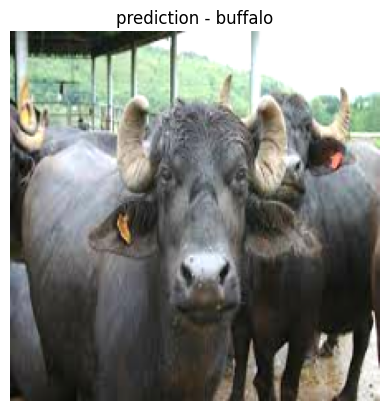

In [76]:
#Finally test
prediction = predict_img(efficientnet_model,"buffaloww.jpeg")
prediction

In [ ]:
pred_probs = efficientnet_model.predict(test_data, verbose=1)

1/1 [==============================] - 0s 104ms/step


In [ ]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

NameError: ignored

In [ ]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

NameError: ignored

In [ ]:
# Note: This might take a minute or so due to unravelling 790 batches
import tensorflow as tf
import numpy
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like (unshuffled)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))


NameError: ignored